In [ ]:
# thai nguyen, yen bai, hoa binh, ha noi, nam dinh, hai phong, hai duong
import pandas as pd

# Đọc file CSV
df = pd.read_csv("weather.csv")

# Danh sách các tỉnh cần giữ lại (không dấu)
provinces = ["Ha Noi", "Hoa Binh", "Yen Bai", "Thai Nguyen", 
             "Hai Duong", "Hai Phong", "Nam Dinh",]

# Lọc các hàng có tỉnh nằm trong danh sách
filtered_df = df[df['province'].isin(provinces)]

# Lưu dữ liệu đã lọc ra file CSV mới (tuỳ chọn)
filtered_df.to_csv("temperature.csv", index=False)


In [20]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("temperature.csv")

# Tạo cột mean_temp bằng cách tính trung bình của max và min
mean_temp = (df['max'] + df['min']) / 2
df.insert(3, 'mean_temp', mean_temp)

# Lưu file CSV với cột mean_temp mới
df.to_csv("temperature.csv", index=False)


In [41]:
import pandas as pd

df = pd.read_csv('temperature.csv')

# Chuyển đổi cột 'date' thành định dạng datetime
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

# Tạo cột 'month' từ cột 'date'
df['month'] = df['date'].dt.month

# Hàm để phân loại tháng thành mùa
def get_season(month):
    if month in [11, 12, 1]:
        return 'Winter'  # Mùa đông
    elif month in [2, 3, 4]:
        return 'Spring'  # Mùa xuân
    elif month in [5, 6, 7]:
        return 'Summer'  # Mùa hè
    elif month in [8, 9, 10]:
        return 'Autumn'  # Mùa thu

# Áp dụng hàm để tạo cột 'season'
df['season'] = df['month'].apply(get_season)
df.to_csv('temperature.csv',index= False)


In [42]:
import pandas as pd
season = df.groupby(['year', 'season'])['mean_temp'].mean()

# Chuyển kết quả thành DataFrame và đặt lại chỉ mục
season = season.reset_index().round(1)

season.to_csv('season.csv', index=False)

In [43]:
# Giả sử cột 'avg_temp' là nhiệt độ trung bình, cột 'year' là năm
df_avg_temp = season[['year', 'mean_temp']]

# Kiểm tra dữ liệu sau khi lọc
print(df_avg_temp.head())


   year  mean_temp
0  2009       27.6
1  2009       24.2
2  2009       28.1
3  2009       18.8
4  2010       27.0


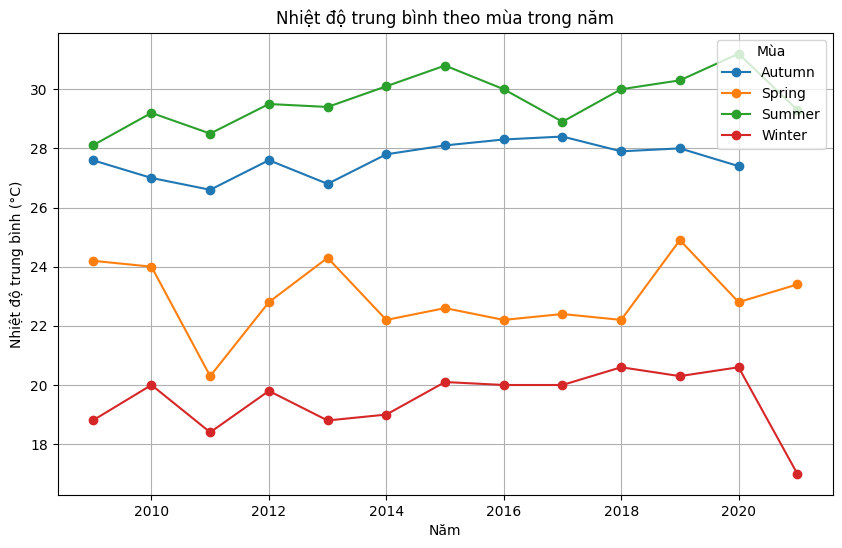

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ CSV
df = pd.read_csv('season.csv')

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
for season in df['season'].unique():
    season_data = df[df['season'] == season]
    plt.plot(season_data['year'], season_data['mean_temp'], marker='o', label=season)

# Cài đặt tiêu đề và nhãn trục
plt.title('Nhiệt độ trung bình theo mùa trong năm')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.legend(title='Mùa',loc = 'upper right')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


In [45]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("temperature.csv")

# Tính max và min của từng mùa trong mỗi năm
season_max = df.groupby(['year', 'season'])['max'].agg(['max']).reset_index()
season_min = df.groupby(['year', 'season'])['min'].agg(['min']).reset_index()

df_merged = pd.read_csv('season.csv')
# Chèn cột max và min vào DataFrame ban đầu
df_merged = pd.merge(df_merged, season_max, on=['year', 'season'], how='left')
df_merged = pd.merge(df_merged, season_min, on=['year', 'season'], how='left')

# Lưu lại file CSV đã thêm max, min
df_merged.to_csv("season.csv", index=False)



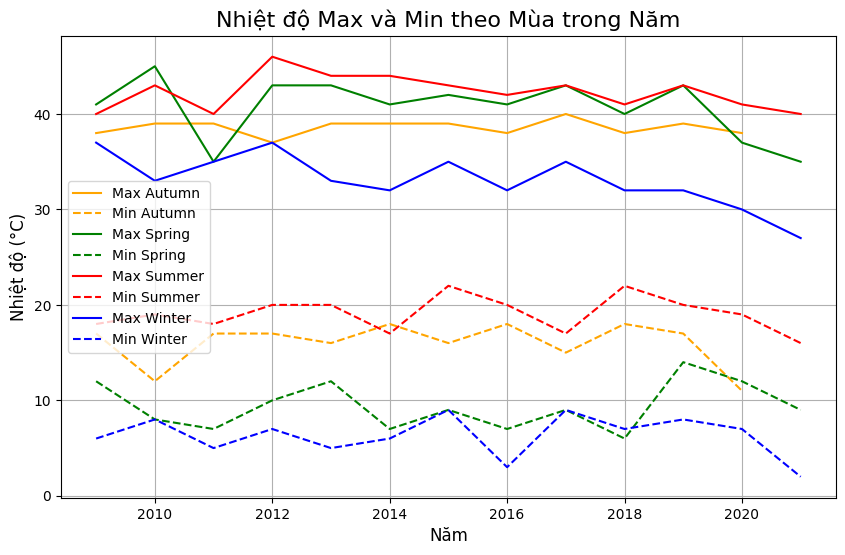

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('season.csv')

# Dựng một từ điển màu sắc cho các mùa
season_colors = {
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'orange',
    'Winter': 'blue'
}

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Lặp qua từng mùa trong dữ liệu
for season in df['season'].unique():
    # Lọc dữ liệu theo mùa
    season_data = df[df['season'] == season]
    
    # Chọn màu cho mỗi mùa từ dictionary
    color = season_colors.get(season, 'black')  # Default màu đen nếu không có mùa
    
    # Vẽ line cho nhiệt độ max và min của mùa này với cùng màu
    plt.plot(season_data['year'], season_data['max'], label=f'Max {season}', color=color)
    plt.plot(season_data['year'], season_data['min'], label=f'Min {season}', color=color, linestyle='--')

# Thêm tiêu đề và nhãn
plt.title('Nhiệt độ Max và Min theo Mùa trong Năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


In [54]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('temperature.csv')

# Nhóm dữ liệu theo năm và tính giá trị max, min, mean_temp trung bình
yearly_stats = df.groupby('year').agg({
    'max': 'max',  # Tính max theo năm
    'min': 'min',  # Tính min theo năm
    'mean_temp': 'mean'  # Tính nhiệt độ trung bình theo năm
}).reset_index()

yearly_stats['mean_temp'] = yearly_stats['mean_temp'].round(1)

# Lưu kết quả vào một file CSV mới
yearly_stats.to_csv('year_temp.csv', index=False)


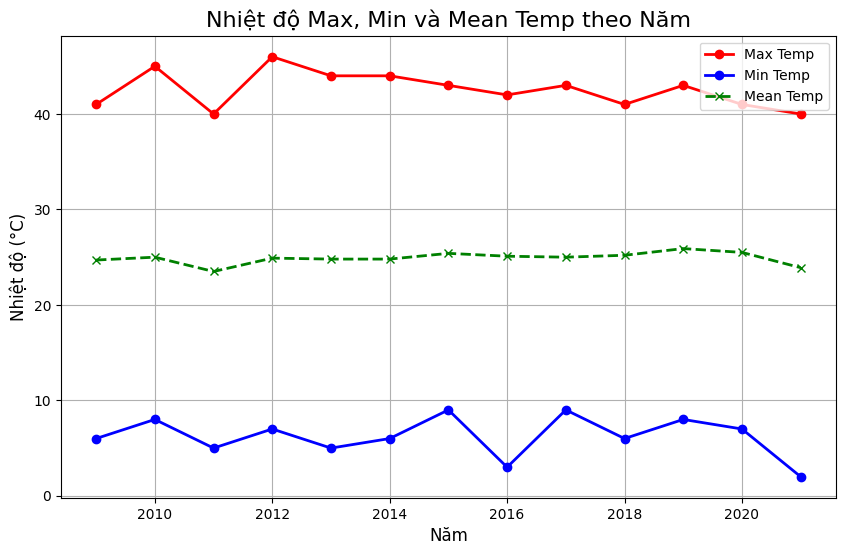

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('year_temp.csv')

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ nhiệt độ max, min và mean_temp theo năm
plt.plot(df['year'], df['max'], label='Max Temp', color='red', marker='o', linestyle='-', linewidth=2)
plt.plot(df['year'], df['min'], label='Min Temp', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(df['year'], df['mean_temp'], label='Mean Temp', color='green', marker='x', linestyle='--', linewidth=2)

# Thêm tiêu đề và nhãn
plt.title('Nhiệt độ Max, Min và Mean Temp theo Năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()
